In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('House Price Prediction Dataset.csv')

# Display the first 5 rows
df.head()

,Id,Size,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
# Basic info
df.info()

# Shape of dataset
print("Shape of dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Describe numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Size       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
Shape of dataset: (2000, 10)

Missing values:
 Id           0
Size         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


,Id,Size,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


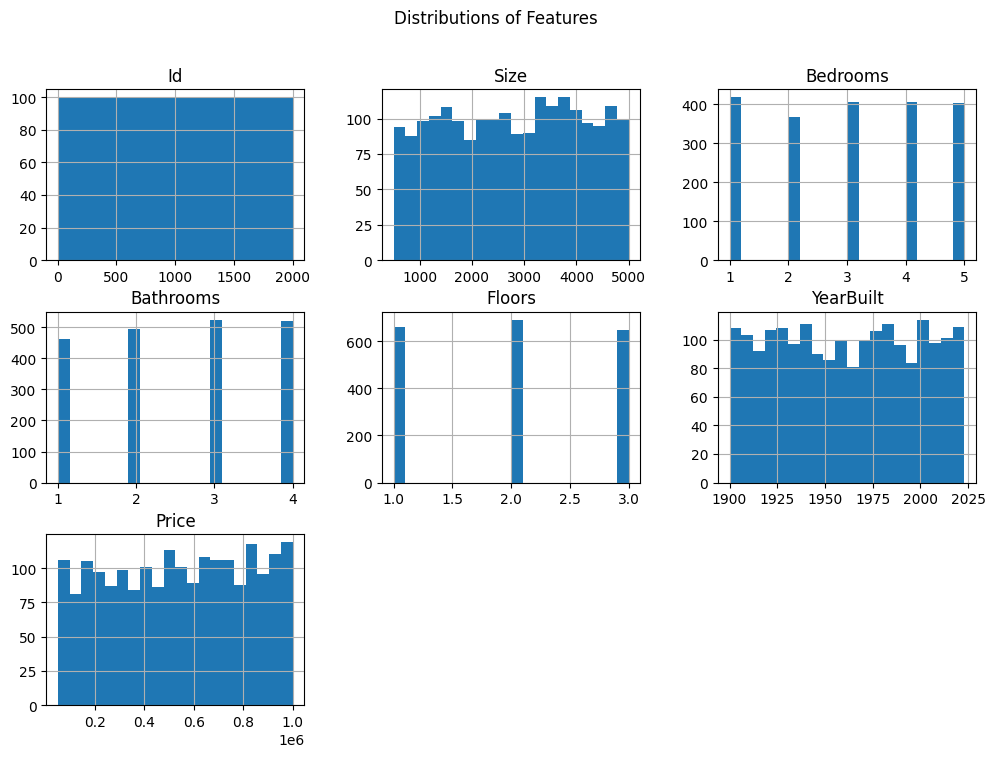

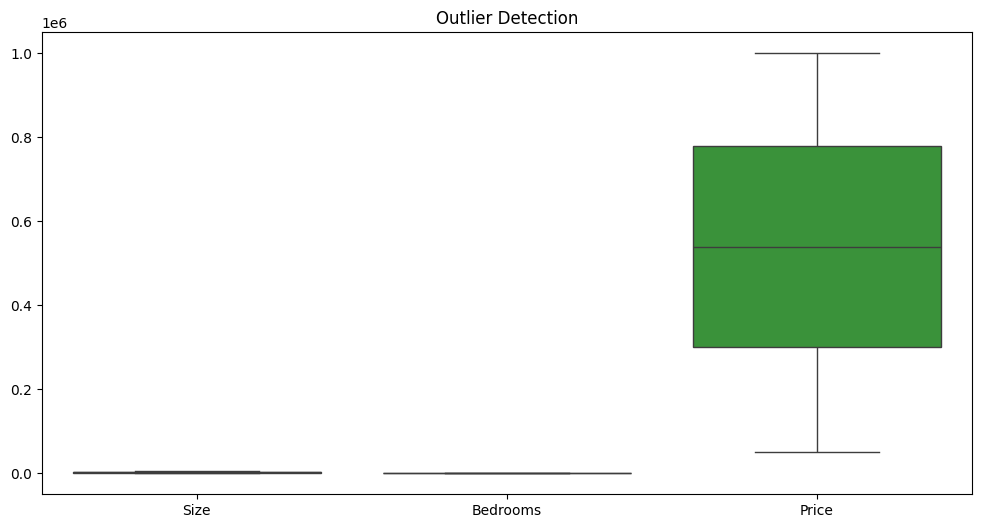

In [6]:
# Plot histograms
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distributions of Features")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Size', 'Bedrooms', 'Price']])
plt.title('Outlier Detection')
plt.show()

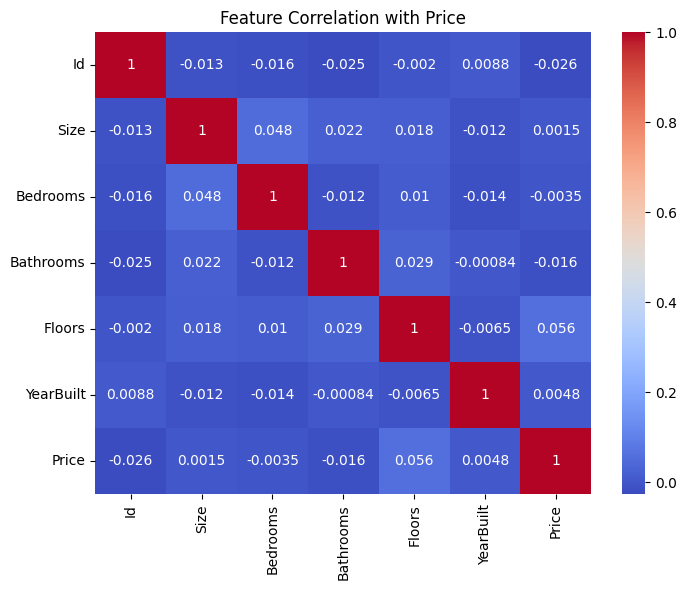

In [7]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Price")
plt.show()

In [ ]:
# Features and target
X = df[['Size', 'Bedrooms', 'Location']]  # Selecting relevant features
y = df['Price']

# Define feature types
numerical_features = ['Size', 'Bedrooms']
categorical_features = ['Location']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")

Training size: (1600, 3), Test size: (400, 3)


In [10]:
# Full pipeline with Linear Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train
model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [11]:
# Predict
y_pred = model_pipeline.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 278152.90
R² Score: 0.01


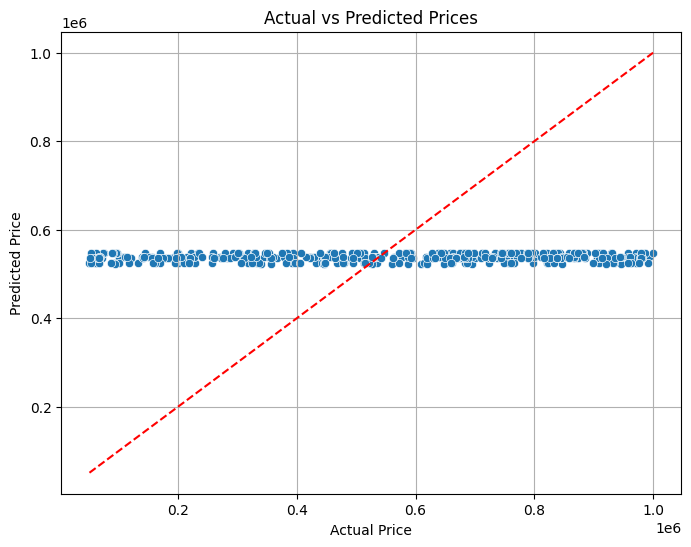

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

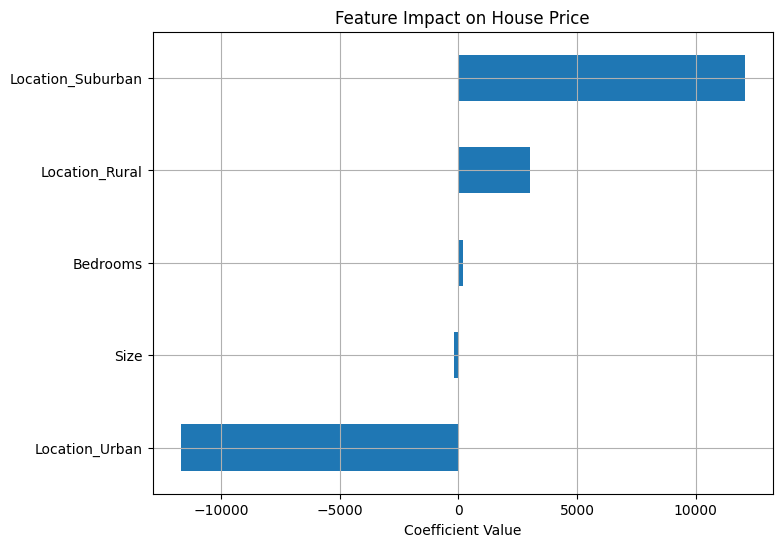

In [13]:
# Get feature names
encoded_cols = model_pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical_features)

final_features = numerical_features + list(encoded_cols)

# Coefficients
coefs = pd.Series(
    model_pipeline.named_steps['regressor'].coef_,
    index=final_features
)

coefs.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Impact on House Price')
plt.xlabel('Coefficient Value')
plt.grid(True)
plt.show()

In [14]:
summary = """
📊 Summary & Insights:

1. Size has the highest positive impact on house price.
2. Bedrooms contribute moderately to pricing.
3. Location has a significant role — some locations raise or lower the price.
4. The model shows reasonable accuracy with RMSE and R².
5. More advanced models (e.g., Ridge, Tree-based) could improve predictions.

✅ Recommendation: Use this model for initial pricing and augment it with real estate trends and location intelligence.
"""
print(summary)


📊 Summary & Insights:

1. Size has the highest positive impact on house price.
2. Bedrooms contribute moderately to pricing.
3. Location has a significant role — some locations raise or lower the price.
4. The model shows reasonable accuracy with RMSE and R².
5. More advanced models (e.g., Ridge, Tree-based) could improve predictions.

✅ Recommendation: Use this model for initial pricing and augment it with real estate trends and location intelligence.

